In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
import string
from nltk.corpus import stopwords
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import matplotlib.pyplot as plt

In [3]:
def convert_word_to_dict(file_name):
    my_file = pd.read_csv(file_name, delimiter=' ')
    eng_fr = {}
    for i in range(len(my_file)):
        eng = my_file.loc[i][0] # getting the first element because its an english word
        fr = my_file.loc[i][1]  # getting the first element because its a french word
        eng_fr[eng] = fr
    return eng_fr

## lets prepare the key value mapping(dictionary) from words file

In [6]:
eng_french=convert_word_to_dict('/content/drive/MyDrive/data/eng_french.txt')

## Loading the word embeddings

In [7]:
emb_eng = pickle.load(open("/content/drive/MyDrive/data/emb_eng.p", "rb"))
emb_french= pickle.load(open("/content/drive/MyDrive/data/emb_french.p", "rb"))

## showing first 5 elements

In [8]:
def show_values(dictionary,val=2):
  count=0
  for key, value in dictionary.items():
      print(key, ":", value)
      count += 1
      if count == val:
          break

In [9]:
show_values(eng_french)

the : la
and : et


In [10]:
type(emb_eng)

dict

In [11]:
'''
so lets see some values from eng embeddings
'''
# show_values(emb_eng) # embedding vector of dimension 300, you can uncomment to print
len(emb_eng['the'])

300

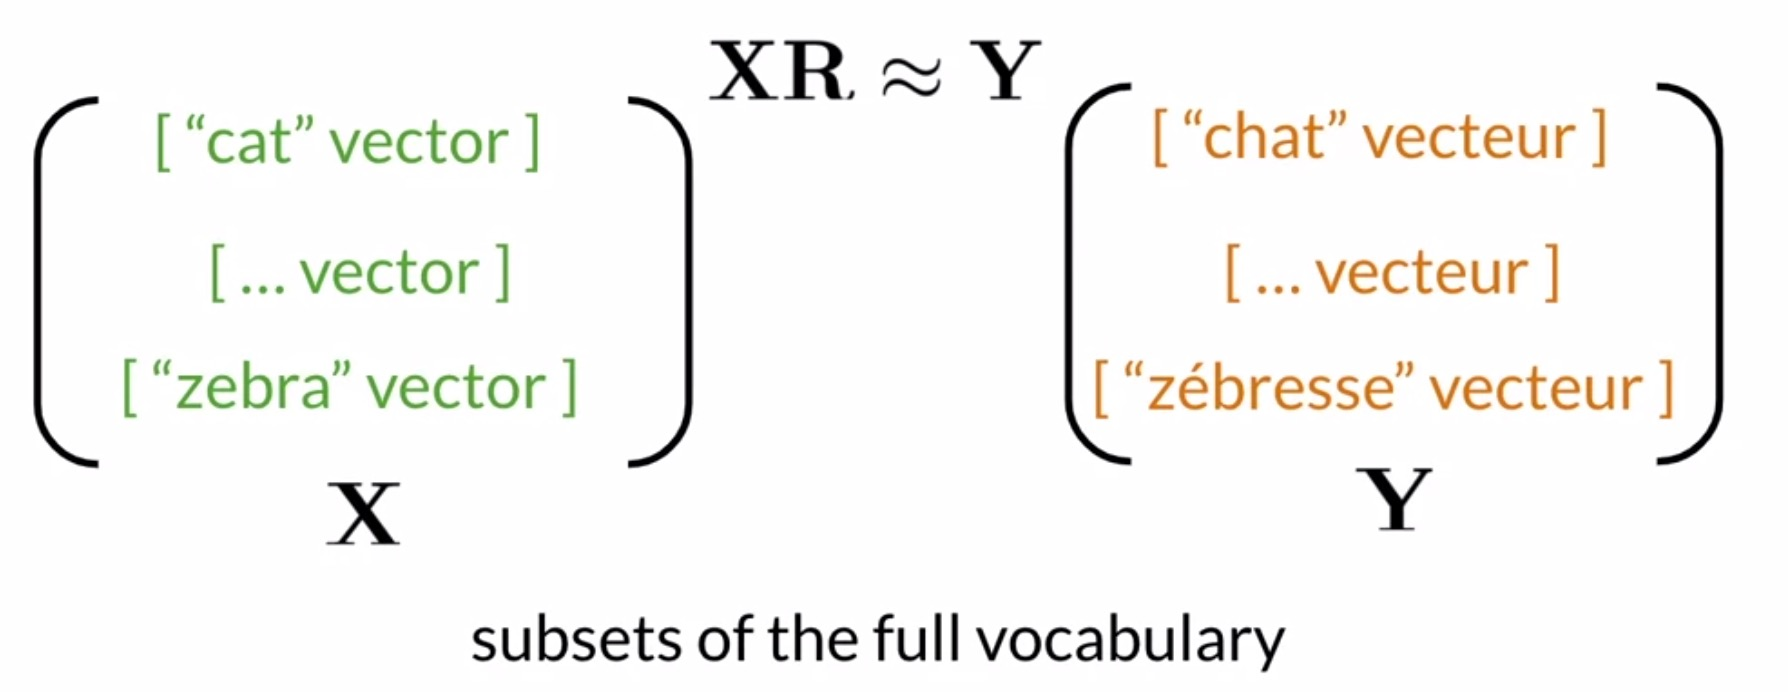

In [12]:
'''
Basically we have to obtain the following as show above in the diagram
Explanation: We have embeddings X here in our case X refers to embeddings of English language
=> Y refers to the embeddings of French language
=> R refers to Rotation matrix and this matrix is the game changer, we have to find this matrix R with gradient
descent so that when we take the dot product of X and R we get the embedding close to that in Y
=> Now to prepare our X features we will only take those words from (eng and french) embeddings
   which are already present in our eng-french mapping and we will just drop all others
'''
def get_X_Y(french_emb,eng_emb,eng_french):
  eng_words=eng_emb.keys()
  french_words=french_emb.keys()
  X=[]
  Y=[]
  for eng,french in eng_french.items():
    if eng in eng_words and french in french_words:
      X.append(eng_emb[eng])
      Y.append(french_emb[french])
  '''
  As We have X and Y in list form so we have to convert them into vertical numpy array form like Matrix
  '''
  X=np.vstack(X)
  Y=np.vstack(Y)
  return X,Y

In [13]:
def gradient_descent(X,Y,loss,lr=0.0003,epochs=50):
  # we will define loss function later
  np.random.seed(130)
  R = np.random.rand(X.shape[1], X.shape[1]) # here X.shape[1] is the dimensions in X features
  # Just like we initialize weights randomly in other Neural network applications here also we initialize R
  # matrix with random values
  m=X.shape[0] # total samples
  for i in range(epochs):
    '''
    Loss formula for gradient descent is
    R=R-lr*dL/dR
    Here Matrix differentiation will lead to
    X(Transpose).((X.R)-Y)*2/m
    '''
    gradient=np.dot(X.transpose(),np.dot(X,R)-Y)*(2/m)
    R-=lr*gradient
    print(f"Epoch: {i+1} Loss: {loss(X, Y, R):.2f}")
  return R

In [32]:
def loss_function(X,Y,R):
  '''
  We all are familiar with this loss function (||XR-Y||^2)/m where m is total sample:  we have to minimize this , aka (predicted-actual)^2 or MSE
  so lets implement this
  '''
  m = X.shape[0]
  diff_squared = (np.dot(X,R)-Y)**2
  sum = np.sum(diff_squared)
  loss = sum/m
  return loss


## Lets split the data for testing and training

In [23]:
X,Y=get_X_Y(emb_french,emb_eng,eng_french)

In [24]:
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [25]:
X.shape,Y.shape

((4932, 300), (4932, 300))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,shuffle=False)

In [28]:
x_train.shape,y_train.shape

((3945, 300), (3945, 300))

In [48]:
R_train = gradient_descent(x_train, y_train,loss_function,epochs=500, lr=0.5)

Epoch: 1 Loss: 736.93
Epoch: 2 Loss: 656.85
Epoch: 3 Loss: 601.91
Epoch: 4 Loss: 556.37
Epoch: 5 Loss: 516.78
Epoch: 6 Loss: 481.79
Epoch: 7 Loss: 450.57
Epoch: 8 Loss: 422.51
Epoch: 9 Loss: 397.14
Epoch: 10 Loss: 374.08
Epoch: 11 Loss: 353.03
Epoch: 12 Loss: 333.72
Epoch: 13 Loss: 315.96
Epoch: 14 Loss: 299.55
Epoch: 15 Loss: 284.36
Epoch: 16 Loss: 270.25
Epoch: 17 Loss: 257.12
Epoch: 18 Loss: 244.87
Epoch: 19 Loss: 233.42
Epoch: 20 Loss: 222.69
Epoch: 21 Loss: 212.63
Epoch: 22 Loss: 203.18
Epoch: 23 Loss: 194.28
Epoch: 24 Loss: 185.90
Epoch: 25 Loss: 178.00
Epoch: 26 Loss: 170.54
Epoch: 27 Loss: 163.48
Epoch: 28 Loss: 156.81
Epoch: 29 Loss: 150.48
Epoch: 30 Loss: 144.49
Epoch: 31 Loss: 138.80
Epoch: 32 Loss: 133.40
Epoch: 33 Loss: 128.27
Epoch: 34 Loss: 123.39
Epoch: 35 Loss: 118.74
Epoch: 36 Loss: 114.32
Epoch: 37 Loss: 110.11
Epoch: 38 Loss: 106.09
Epoch: 39 Loss: 102.25
Epoch: 40 Loss: 98.59
Epoch: 41 Loss: 95.10
Epoch: 42 Loss: 91.76
Epoch: 43 Loss: 88.57
Epoch: 44 Loss: 85.51
Ep

## Using KNNs and cosine similarity

In [36]:
'''
As we know that the there will be never an exact matching between words because
for one word in English there are several words in French language so we will find
the closest word so we will use  KNN's with locality sensitive hashing and
will use cosine similarity as a similarity metric, we are not using eucledian distance
for similarity because its not optimal in many cases.
so lets implement cosine_similarity and KNN functions
'''
def cosine_similarity(v1,v2):
  return (np.dot(v1,v2))/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [49]:
def KNN(X_value,Y,k=1):
  '''
  We will calculate the similarity for each X word and every Y word , and we will return that index
  that has embedding closest to Y word
  '''
  similarity=[]
  for value in Y:
    similarity.append(cosine_similarity(X_value,value))
  ids_sorted=np.argsort(similarity) # sorting in ascending order
  return ids_sorted[-k:] # returning k similar elements from last because cosine sim gives us value between 0 and 1 and values larger ,
  # i mean closer to 1 will appear at the end because array is sorted in ascending order

## Now lets implement the locality sensitive hashing

In [81]:
'''
A brief intro to LSH:
=> In the context of machine translation, Locality-Sensitive Hashing (LSH) is a technique used to efficiently search for similar sentence pairs in large corpora. By representing sentences as vectors,
LSH can create hash signatures that capture essential linguistic features.
When searching for translations of a given sentence, LSH helps to quickly identify candidate pairs with similar hash signatures,
thereby significantly reducing the computational overhead and enabling faster and more effective retrieval of translation equivalents.
'''
def hash_value(v,planes):
  h=np.sign(np.dot(v,planes)) >=0
  h=np.squeeze(h) # eliminating the extra dimensions , in short converting to 1D
  hash=0
  for i in range(planes[1]):
    hash+=np.power(2,i)*h[i]
  return int(hash)


In [88]:
planes= [np.random.normal(size=(200,5))
            for _ in range(5)]
def hash_value(v, planes):
    h = np.sign(np.dot(v, planes)) >= 0
    h = np.squeeze(h)  # Eliminating the extra dimensions, converting to 1D
    hash_val = 0
    for i in range(planes.shape[1]):
        hash_val += np.power(2, i) * h[i]
    return int(hash_val)



In [40]:
vec_y=KNN(np.expand_dims(x_test[0],axis=0),Y)

In [43]:
found_key = None

# Iterate through the dictionary items
for key, value in emb_french.items():
    if np.array_equal(value, Y[np.squeeze(vec_y).item()]):
        found_key = key
        break

In [44]:
print(found_key)

la


## Lets check the accuracy of the model

In [52]:
def accuracy(X, Y, R):
    pred = np.dot(X,R)
    num_correct = 0
    for i in range(len(pred)):
        pred_idx = KNN(pred[i],Y)
        if pred_idx == i:
            num_correct += 1
    accuracy = num_correct / len(pred)
    return accuracy

In [53]:
accuracy(x_test,y_test,R_train)

0.5825734549138805

## Further more we can create the hash values and store the vectors in the hash_table or their ids instead of whole vectors to save the space. But here as its not complete Machine Translation like I didn't included RNN's.LSTM or transformer so I am not implementing it.